<h1 align="center">UNIVERSIDADE ESTADUAL DE CAMPINAS</h1> 

<h1 align="center">INSTITUTE OF COMPUTING</h1> 

<h2 align="center">Machine Learninng</h2> 
<h2 align="center">MC886A/MO444A</h2> 


- Luis Bernal Chahuayo (RA 234923)
- Jarol Butron Soria (RA 234833)

## 1. Introduction
<p>Clustering allows us to be able to group a set of objects into subsets of objects called clusters, each cluster is made up of a collection of objects that are similar to each other, but that are different from the objects of other clusters. It can be used for the diagnosis of diseases through images, in the monitoring of social networks, marketing. Clustering is part of unsupervised learning, there are some clustering methods such as k-means, hierarchical clustering, K-medoids, DBSCAN, Hierarchical Clustering, etc.</p>

## 2- K-means
### 2.1 Load Datasets


In [17]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

df = pd.read_table("cluster.dat",header=None, sep="\s+")
datos = pd.DataFrame(df)
datos


,0,1
0,1555.0,28.65
1,1490.0,27.55
2,1445.0,28.35
3,1415.0,28.80
4,1375.0,28.05
...,...,...
568,3420.0,27.95
569,3465.0,26.85
570,3525.0,26.00
571,3570.0,26.15


- Transforming the dataset to an array


In [18]:
datos=datos.to_numpy()
datos

array([[1555.  ,   28.65],
       [1490.  ,   27.55],
       [1445.  ,   28.35],
       ...,
       [3525.  ,   26.  ],
       [3570.  ,   26.15],
       [3440.  ,   25.6 ]])

- Shuffle data

In [19]:
np.random.shuffle(datos)
datos

array([[3175.  ,   20.75],
       [3425.  ,   24.1 ],
       [1570.  ,    7.15],
       ...,
       [3415.  ,   19.3 ],
       [ 535.  ,   24.7 ],
       [2005.  ,    9.95]])

## 2.2 Split Dataset 
- Split data in training/test sets (90/10) 

In [20]:
datos_train = datos[:int(0.9*len(datos))]
datos_test = datos[int(0.9*len(datos)):]

x_train = datos_train[:,0]
y_train = datos_train[:,1]

x_test = datos_test[:,0]
y_test = datos_test[:,1]


## 2.3 Pre-processing
- Normalization

In [21]:
def normalization(x,y,x_max,x_min,y_max,y_min):
    x=(x-x_min)/(x_max-x_min) 
    y=(y-y_min)/(y_max-y_min)
    return x,y

x_max_train = x_train.max()
x_min_train= x_train.min()
y_max_train = y_train.max()
y_min_train = y_train.min()

x_max_test = x_test.max()
x_min_test = x_test.min()
y_max_test = y_test.max()
y_min_test = y_test.min()

x_n_train, y_n_train = normalization(x_train,y_train,x_max_train,x_min_train,y_max_train,y_min_train)
x_n_test, y_n_test = normalization(x_test,y_test,x_max_test,x_min_test,y_max_test,y_min_test)

## 2.4 Distortion

$$
SSE=\sum_{i=1}^{m} {(y_i - \hat{y_i})}^{2}
$$

In [22]:
def Distortion(x,y,centroides_x,centroides_y):
    distortion = ( ( x - centroides_x )**2 + ( y - centroides_y )**2 ).sum()
    return distortion

## 2.5 Metrics to evaluate
- Root mean squared error standard deviation (RMSSTD)

$$
RMSSTD= \sqrt{\frac{{\sum_i}{\sum_{x{\in}c_i}}{{\parallel x-c_i\parallel}}^{2}}{p.{\sum_i (n_i - 1)}}}
$$


In [24]:
def RMSSTD(x,y,punto_x,punto_y,matriz_clusters,k):
    centroides_x = np.matmul(matriz_clusters,punto_x)
    centroides_y = np.matmul(matriz_clusters,punto_y)
    distortion = Distortion(x,y,centroides_x,centroides_y)
    number_attributes = 2 * ( len(x) - k )
    return np.sqrt(distortion/number_attributes)



## 2.6 K-means-Implementation

In [23]:

def kmeans(k,x,y,x_min,x_max,y_min,y_max):
    # Find min and max values    
    x_min=np.min(x)
    x_max=np.max(x)
    y_min=np.min(y)
    y_max=np.max(y)
   
    # Select K Random Points
    punto_x=np.random.uniform(low=x_min,high=x_max,size=k)
    punto_y=np.random.uniform(low=y_min,high=y_max,size=k)
    
    old_distortion = np.inf

    for it in range(20):
        # Create distance matrix
        matriz_distancias = np.zeros((len(x),k))
        for k_i in range(k):
            # Euclidean distance
            x_h=(x-punto_x[k_i])**2
            y_h=(y-punto_y[k_i])**2
            dist= np.sqrt(x_h+y_h)
            matriz_distancias[:,k_i]=dist

        # Find the minimum distance - Creation of mask matrix
    
        min=np.argmin(matriz_distancias,axis=1)
        matriz_clusters=np.zeros(matriz_distancias.shape)
        i=0
        for min_i in min:
            matriz_clusters[i][min_i]=1
            i+=1

        # Column matrix transformation
        x_r=x.reshape(-1,1)
        y_r=y.reshape(-1,1)

        # Sum of cluster values
        matriz_clusters_x=x_r*matriz_clusters
        matriz_clusters_y=y_r*matriz_clusters

        total=matriz_clusters.sum(axis=0)

        total_x=matriz_clusters_x.sum(axis=0)
        total_y=matriz_clusters_y.sum(axis=0)

        # Update point with mean total_x
        punto_x=(total_x/ (total+0.0000000001) )
        punto_y=(total_y/ (total+0.0000000001) )

        # Cluster list
        clusters = np.argmax(matriz_clusters,axis=1)
        centroides_x = np.matmul(matriz_clusters,punto_x)
        centroides_y = np.matmul(matriz_clusters,punto_y)
        
        distortion = Distortion(x,y,centroides_x,centroides_y)
        
        # Distortion - Condition
        if ( abs( old_distortion - distortion ) <= 0.001 ): break
        else: old_distortion = distortion


    print ( "\n \n DISTORTION =",distortion, "ITERATION=", it)
    plt.scatter(x,y,marker="o",c=clusters)
    plt.scatter(punto_x,punto_y,marker="*",c="red")
    plt.show()

    return punto_x,punto_y,matriz_clusters,distortion


## 2.7 Elbow Method
- Evaluation of different numbers of clusters


 
 DISTORTION = 86.97233825875404 ITERATION= 1


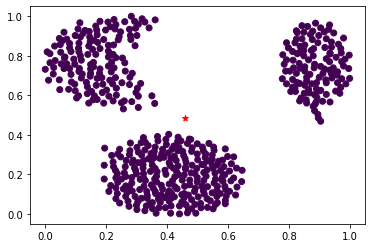


 
 DISTORTION = 53.39020190556849 ITERATION= 3


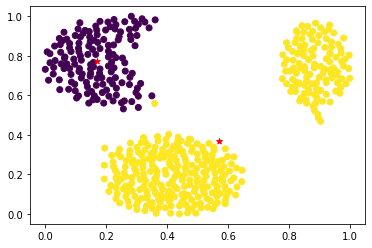


 
 DISTORTION = 11.376902116044763 ITERATION= 2


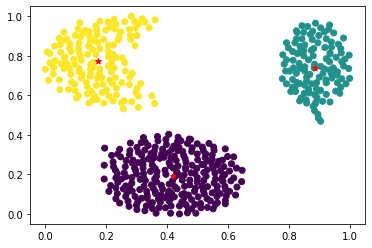


 
 DISTORTION = 9.076993856612756 ITERATION= 13


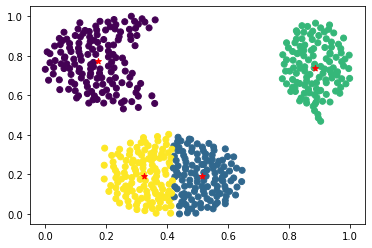


 
 DISTORTION = 7.873655622311817 ITERATION= 17


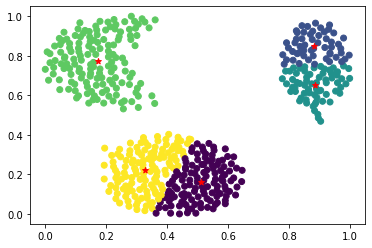


 
 DISTORTION = 6.133092712848445 ITERATION= 9


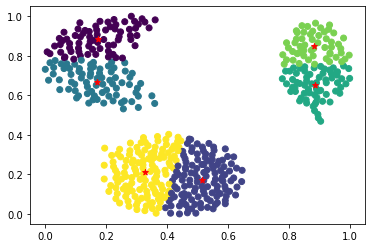


 
 DISTORTION = 6.146907988463721 ITERATION= 10


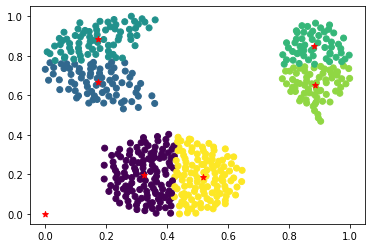


 
 DISTORTION = 5.5097447957426215 ITERATION= 6


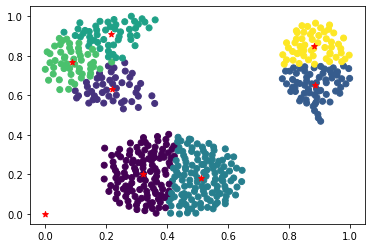


 
 DISTORTION = 4.80413540944616 ITERATION= 8


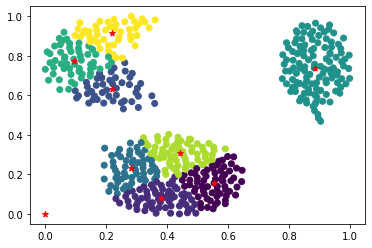


 
 DISTORTION = 5.303764449033407 ITERATION= 5


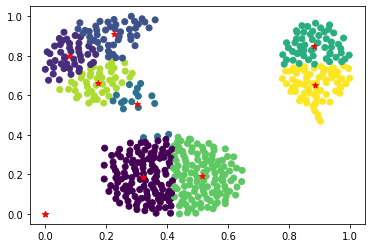

Disttortion


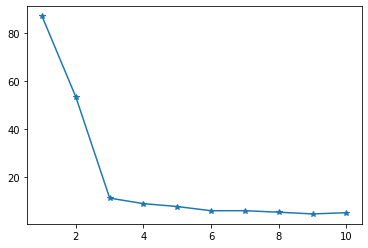

Root Mean Squared Standard Deviation


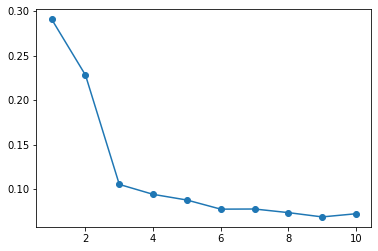

In [25]:
def metodo_codo(k_max):
    list_distortions = []
    list_rmmstds = []
    for k in range(1,k_max+1):
        centroide_x , centroide_y , matriz_clusters , distortion = kmeans(k,x_n_train,y_n_train,x_min_train,x_max_train,y_min_train,y_max_train)
        rmmstd = RMSSTD(x_n_train,y_n_train,centroide_x,centroide_y, matriz_clusters, k)
        list_distortions.append(distortion)
        list_rmmstds.append(rmmstd)
    
    print("Disttortion")
    plt.plot(range(1,k_max+1),list_distortions,marker="*")
    plt.show()

    print("Root Mean Squared Standard Deviation")
    plt.plot(range(1,k_max+1),list_rmmstds,marker="o")
    plt.show()



metodo_codo(10)

## 3. DBSCAN

[0. 0. 1. 0. 1. 2. 2. 1. 1. 1. 1. 1. 1. 1. 2. 0. 2. 1. 1. 0. 1. 1. 0. 2.
 1. 2. 0. 0. 1. 2. 2. 2. 1. 0. 1. 1. 2. 0. 1. 0. 1. 0. 2. 0. 2. 1. 1. 2.
 1. 0. 0. 1. 2. 1. 2. 1. 1. 0. 1. 2. 2. 2. 0. 1. 2. 1. 1. 1. 0. 1. 0. 1.
 2. 2. 1. 1. 1. 2. 1. 1. 1. 1. 0. 2. 0. 2. 1. 1. 2. 2. 1. 2. 1. 1. 0. 2.
 1. 0. 0. 1. 2. 1. 1. 1. 2. 0. 0. 0. 0. 2. 1. 0. 2. 2. 1. 1. 1. 1. 2. 1.
 1. 0. 2. 2. 1. 1. 1. 2. 2. 2. 1. 0. 0. 2. 0. 2. 1. 1. 1. 2. 1. 1. 2. 1.
 1. 2. 2. 1. 1. 1. 2. 2. 2. 1. 1. 1. 2. 1. 2. 0. 2. 1. 1. 2. 0. 0. 2. 1.
 1. 0. 1. 2. 2. 1. 2. 0. 2. 1. 1. 0. 1. 2. 1. 1. 1. 1. 1. 1. 2. 1. 1. 0.
 1. 1. 1. 0. 1. 0. 0. 2. 2. 1. 2. 0. 2. 0. 1. 0. 1. 2. 1. 1. 1. 1. 1. 1.
 0. 0. 1. 1. 2. 1. 2. 0. 2. 0. 2. 1. 2. 1. 2. 1. 2. 0. 1. 2. 0. 0. 0. 1.
 1. 2. 0. 2. 1. 1. 2. 1. 1. 0. 1. 2. 1. 1. 1. 0. 2. 0. 1. 0. 1. 2. 2. 2.
 1. 1. 0. 0. 2. 2. 1. 0. 1. 2. 1. 1. 1. 1. 2. 1. 0. 1. 1. 2. 0. 1. 2. 2.
 2. 1. 2. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 2. 0. 0. 1. 0. 0. 1. 2.
 2. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1.

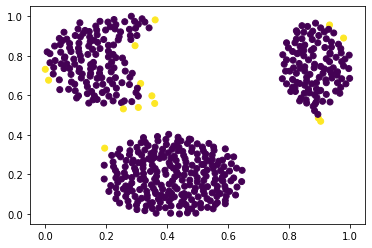

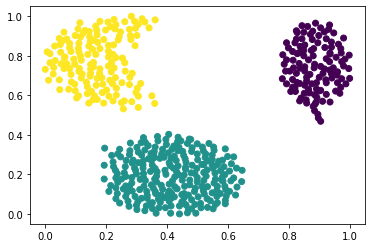

In [26]:
def dbscan(x,y, radio, M ):
    marcas = np.zeros( x.shape )
    # 0 No worked 
    # 1 Core Point
    # 2 Border
    # 3 Outlier

    while( True ):
        por_procesar = np.where( marcas == 0)
        if ( len ( por_procesar[0] ) == 0): break
        p_index = por_procesar[0][0] 
        punto_x = x[p_index]
        punto_y = y[p_index]
        distancias = np.sqrt ( ( x - punto_x )**2 + ( y - punto_y )**2 )
        n_vecinos = len ( distancias[ distancias < radio ]  )
        if  n_vecinos >= M:
            marcas[p_index] = 1
        elif n_vecinos > 0 : 
            marcas[p_index] = 2
        else: 
            marcas[p_index] = 3
    clusters = -1 * np.ones ( marcas.shape ) 
    visitados = np.zeros ( marcas.shape  , dtype=bool)
    core_points = np.where(marcas == 1)[0]
    n_cluster = 0
    while ( True ):
        if ( len(core_points) == 0 ) : break
        if  len(  np.where ( ( ~ visitados ) & ( clusters != -1  ) & ( marcas == 1 ) )[0]  ) == 0:
            c_p_x = x[core_points[0]]
            c_p_y = y[core_points[0]]
            visitados[ core_points[0] ] = 1 
            distancias = np.sqrt ( ( x - c_p_x )**2 + ( y - c_p_y )**2 )
            clusters[ np.where(distancias < radio)  ] = n_cluster 
            core_points = core_points[ 1 : ]
            n_cluster += 1 
        else: 
            core_points_nuevos = np.where ( ( ~ visitados ) & ( clusters != -1  ) & ( marcas == 1 ) )[0]      
            c_p_x = x[core_points_nuevos[0]]
            c_p_y = y[core_points_nuevos[0]]
            visitados[ core_points_nuevos[0] ] = 1 
            distancias = np.sqrt ( ( x - c_p_x )**2 + ( y - c_p_y )**2 )
            clusters[ np.where(distancias < radio)  ] = clusters[ core_points_nuevos[0] ]
            core_points = np.delete(core_points, np.where( core_points == core_points_nuevos[0] ))
    
    print ( clusters )

    plt.scatter(x,y,c=marcas)
    plt.show()

    plt.scatter(x,y,c=clusters)
    plt.show()

dbscan(x_n_train,y_n_train,0.07, 9 )



In [27]:
d = pd.read_table("yeast.data",header=None, sep="\s+")
datos_2 = pd.DataFrame(d)
datos_2

,0,1,2,3,4,5,6,7,8,9
0,ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT
...,...,...,...,...,...,...,...,...,...,...
1479,YUR1_YEAST,0.81,0.62,0.43,0.17,0.5,0.0,0.53,0.22,ME2
1480,ZIP1_YEAST,0.47,0.43,0.61,0.40,0.5,0.0,0.48,0.47,NUC
1481,ZNRP_YEAST,0.67,0.57,0.36,0.19,0.5,0.0,0.56,0.22,ME2
1482,ZUO1_YEAST,0.43,0.40,0.60,0.16,0.5,0.0,0.53,0.39,NUC


In [28]:
yeast = datos_2 [ range(1,9) ].to_numpy()

In [29]:
yeast


array([[0.58, 0.61, 0.47, ..., 0.  , 0.48, 0.22],
       [0.43, 0.67, 0.48, ..., 0.  , 0.53, 0.22],
       [0.64, 0.62, 0.49, ..., 0.  , 0.53, 0.22],
       ...,
       [0.67, 0.57, 0.36, ..., 0.  , 0.56, 0.22],
       [0.43, 0.4 , 0.6 , ..., 0.  , 0.53, 0.39],
       [0.65, 0.54, 0.54, ..., 0.  , 0.53, 0.22]])

color (array([0, 0, 0, ..., 5, 1, 2], dtype=int64), array(['MIT', 'NUC', 'CYT', 'ME1', 'EXC', 'ME2', 'ME3', 'VAC', 'POX',
       'ERL'], dtype=object))


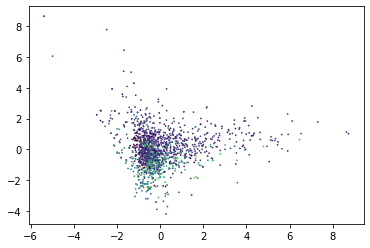

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

from sklearn.preprocessing import StandardScaler,RobustScaler
#yeast_n = StandardScaler().fit_transform(yeast)
yeast_n = RobustScaler().fit_transform(yeast)

principalComponents = pca.fit_transform(yeast_n)
principalComponents

colores = datos_2[[9]].to_numpy()

print("color", pd.factorize(np.ravel(colores))  ) 
plt.scatter(principalComponents[:,0],principalComponents[:,1],c=pd.factorize(np.ravel(colores))[0],s=0.5)


In [57]:
x_train_yeast = principalComponents[:,0]
y_train_yeast = principalComponents[:,1]

x_max= x_train_yeast.max()
x_min= x_train_yeast.min()
y_max= y_train_yeast.max()
y_min= y_train_yeast.min()





[-0.16608764 -0.01823852 -0.16362587 ... -0.14766621 -0.04369584
 -0.15814411]
